# Post-Processing (BATCH I)

#### Updated: Mar 5, 2023

#  

Reprocess BATCH I metadata to adjust year '0' baseline from 1960 to 1962. Then, retrieve the correct station number and modify station metadata. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time

In [2]:
dataDir = 'C:/Users/rnaidoo/Documents/Projects_data/Alouette_I/' #'L:/DATA/Alouette_I/BATCH_I_Run1/05_result/'

#  

#### Load results:

In [3]:
df_result = pd.read_csv(f'{dataDir}result_total_v20230116.csv')
print(len(df_result))
df_result.head()

c:\DevSoftware\Anaconda38\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15,18,21,22,23,24,25,26,27,28,31,57,60,64,65,66,67,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


812606


fmin_Run1  max_depth_Run1  satellite_number_Run1  year_Run1  day_Run1  \
0        1.5      387.500000                    1.0     1961.0       3.0   
1        1.5      556.250000                    1.0     1961.0       2.0   
2        1.5      654.166667                    0.0     1960.0       2.0   
3        1.5      504.166667                    0.0     1960.0       2.0   
4        1.5      504.166667                    0.0     1961.0       2.0   

   hour_Run1  minute_Run1  second_Run1  station_number_Run1 Station Name_Run1  \
0        2.0          2.0          3.0                  3.0    Ottawa, Canada   
1        2.0          2.0          3.0                  3.0    Ottawa, Canada   
2        2.0          3.0          2.0                  3.0    Ottawa, Canada   
3        2.0          3.0          2.0                  3.0    Ottawa, Canada   
4        2.0          2.0          3.0                  3.0    Ottawa, Canada   

   ... y_centroids_Run1_md is_dot_Run1_md dict_metadata_Run1_md  \
0  ...                 NaN            NaN                   NaN   
1  ...                 NaN            NaN                   NaN   
2  ...                 NaN            NaN                   NaN   
3  ...                 NaN            NaN                   NaN   
4  ...                 NaN            NaN                   NaN   

  details_Run1_md Roll_Run1_md Subdirectory_Run1_md  filename_Run1_md  \
0             NaN   R014207815             3488-15A            10.png   
1             NaN   R014207815             3488-15A           101.png   
2             NaN   R014207815             3488-15A           102.png   
3             NaN   R014207815             3488-15A           106.png   
4             NaN   R014207815             3488-15A           107.png   

   rotated_metadata_Run1 station_code_Run1  station_code_Run1_md  
0                    NaN               NaN                   NaN  
1                    NaN               NaN                   NaN  
2                    NaN               NaN                   NaN  
3                    NaN               NaN                   NaN  
4                    NaN               NaN                   NaN  

[5 rows x 75 columns]

In [4]:
#for col in df_result.columns:
#    print(col)

#  

#### Reduce columns:

In [4]:
Run1_cols = ['fmin', 'max_depth', 'processed_image_class', 'func_name', 'limits', 'height', 'width', 'raw_coord', 
             'window_coord', 'mapping_Hz', 'mapping_km', 'details']
Run1_md_cols = ['satellite_number', 'year', 'day', 'hour', 'minute', 'second', 'station_number', 'Station Name', 
                '3 - Letter Code', 'LAT.', 'LONG. ', 'metadata_type', 'meta_height', 'meta_width', 'x_centroids', 
                'y_centroids', 'is_dot', 'dict_metadata', 'day_1', 'day_2', 'day_3', 'hour_1', 'hour_2', 'minute_1',
                'minute_2', 'second_1', 'second_2', 'station_number_1', 'station_number_2', 'station_code']

for col in Run1_cols:
    df_result[col] = df_result[f'{col}_Run1']
for col in Run1_md_cols:
    df_result[col] = df_result[f'{col}_Run1_md']

In [5]:
df_result = df_result[['Roll', 'Subdirectory', 'filename', 'processed_image_class', 'fmin', 'max_depth', 'year', 'day', 
                       'hour', 'minute', 'second', 'station_number', 'satellite_number', 'day_1', 'day_2', 'day_3', 
                       'hour_1', 'hour_2', 'minute_1', 'minute_2', 'second_1', 'second_2', 'station_number_1', 
                       'station_number_2', 'metadata_type', 'is_dot', 'func_name', 'limits']] 

In [6]:
df_result.head()

Roll Subdirectory filename processed_image_class  fmin   max_depth  \
0  R014207815     3488-15A   10.png                   num   1.5  387.500000   
1  R014207815     3488-15A  101.png                   num   1.5  556.250000   
2  R014207815     3488-15A  102.png                   num   1.5  654.166667   
3  R014207815     3488-15A  106.png                   num   1.5  504.166667   
4  R014207815     3488-15A  107.png                   num   1.5  504.166667   

     year    day  hour  minute  ...  minute_1  minute_2  second_1  second_2  \
0  1961.0  111.0  11.0    11.0  ...       1.0       1.0       1.0       2.0   
1  1961.0   11.0  11.0    11.0  ...       1.0       1.0       2.0       1.0   
2  1960.0  101.0  20.0    21.0  ...       2.0       1.0       1.0       1.0   
3  1960.0  110.0  20.0    21.0  ...       2.0       1.0       1.0       1.0   
4  1961.0   11.0  11.0    20.0  ...       2.0       0.0       2.0       1.0   

   station_number_1  station_number_2  metadata_type  is_dot  func_name  \
0               1.0               2.0            NaN     NaN        NaN   
1               1.0               2.0            NaN     NaN        NaN   
2               2.0               1.0            NaN     NaN        NaN   
3               2.0               1.0            NaN     NaN        NaN   
4               1.0               2.0            NaN     NaN        NaN   

   limits  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  

[5 rows x 28 columns]

#  

#### Adjust year baseline to 1962:

In [7]:
df_result['year'] = df_result['year'] + 2

In [8]:
df1 = df_result.copy(deep=True)
df1['count'] = 1
df1 = df1.groupby(['year']).sum()
df1 = df1.reset_index()
df1[['year', 'count']]

year   count
0   1962.0    7672
1   1963.0   41575
2   1964.0   59006
3   1965.0  202298
4   1966.0  163321
5   1967.0   62342
6   1968.0     350
7   1969.0      98
8   1970.0     170
9   1971.0     630
10  1972.0      54
11  1973.0      73
12  1974.0      83
13  1975.0      54
14  1976.0       1
15  1977.0       2
16  1978.0      12
17  1979.0       2
18  1980.0       4
19  1981.0      14
20  1982.0       5
21  1983.0       1
22  1987.0       1
23  1989.0       2

#  

#### Check day digits are < 10, reprocess day of the year:

In [9]:
df_result[['day_1', 'day_2', 'day_3', 'day']].sample(10)

day_1  day_2  day_3    day
228281    3.0    3.0    0.0  330.0
559108    0.0    4.0    8.0   48.0
251454    0.0    8.0    2.0   82.0
697857    2.0    4.0    9.0  249.0
148689    NaN    NaN    NaN    NaN
431558    3.0    5.0    3.0  353.0
573864    NaN    NaN    NaN    NaN
174690    3.0    1.0    2.0  312.0
98161     1.0    2.0    2.0  122.0
380095    1.0    9.0    7.0  197.0

<AxesSubplot:xlabel='day_1', ylabel='Count'>

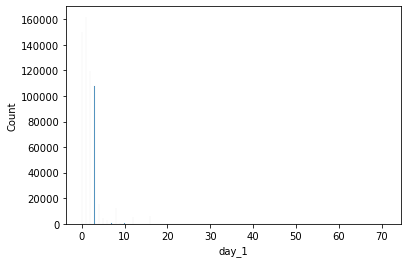

In [10]:
sns.histplot(data=df_result, x='day_1')

#  

In [40]:
df_filter = df_result.loc[df_result['day_1'] > 9]
df_filter = df_filter.loc[df_filter['processed_image_class'] == 'dot']
print(len(df_filter))

12363


In [41]:
df_filter[['day_1', 'day_2', 'day_3', 'day', 'processed_image_class', 'Roll', 'Subdirectory', 'filename']].sample(10)

day_1  day_2  day_3       day processed_image_class         Roll  \
325265   16.0    2.0   16.0   16216.0                   dot  R014207940F   
172221   16.0    4.0   20.0   16420.0                   dot  R014207907F   
771370   16.0   16.0   16.0  161616.0                   dot  R014207978F   
325354   12.0    2.0    6.0    1226.0                   dot  R014207940F   
772744   16.0   12.0   12.0  161212.0                   dot  R014207978F   
769651   16.0    8.0   12.0   16812.0                   dot  R014207978F   
329673   12.0   10.0    0.0   12100.0                   dot  R014207940F   
179345   16.0    8.0    2.0    1682.0                   dot  R014207907F   
238164   16.0    8.0    4.0    1684.0                   dot  R014207929F   
234802   12.0    8.0    6.0    1286.0                   dot  R014207929F   

       Subdirectory       filename  
325265          397  Image0023.png  
172221          492  Image0242.png  
771370          320  Image0059.png  
325354          397  Image0418.png  
772744          323  Image0337.png  
769651          315  Image0290.png  
329673          408  Image0431.png  
179345          516  Image0053.png  
238164          456  Image0321.png  
234802          447  Image0032.png

#  

In [12]:
df_result['day_1'] = df_result['day_1'].apply(lambda x: np.nan if x>9 else x)
df_result['day_1'] = df_result['day_1'].astype('Int64')

<AxesSubplot:xlabel='day_1', ylabel='Count'>

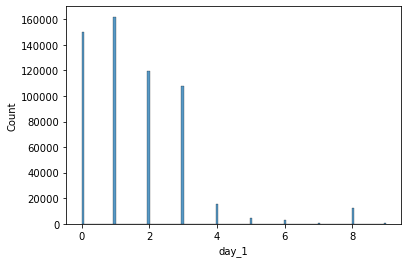

In [13]:
sns.histplot(data=df_result, x='day_1')

<AxesSubplot:xlabel='day_2', ylabel='Count'>

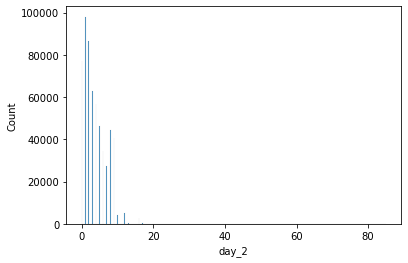

In [14]:
sns.histplot(data=df_result, x='day_2')

In [15]:
df_result['day_2'] = df_result['day_2'].apply(lambda x: np.nan if x>9 else x)
df_result['day_2'] = df_result['day_2'].astype('Int64')

<AxesSubplot:xlabel='day_2', ylabel='Count'>

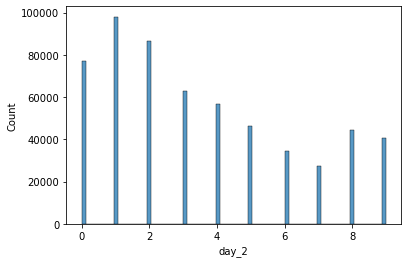

In [16]:
sns.histplot(data=df_result, x='day_2')

<AxesSubplot:xlabel='day_3', ylabel='Count'>

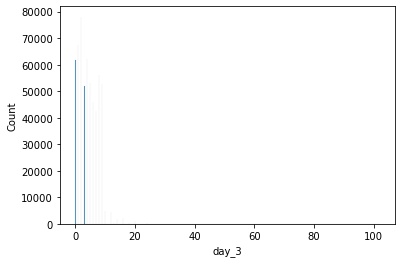

In [17]:
sns.histplot(data=df_result, x='day_3')

In [18]:
df_result['day_3'] = df_result['day_3'].apply(lambda x: np.nan if x>9 else x)
df_result['day_3'] = df_result['day_3'].astype('Int64')

<AxesSubplot:xlabel='day_3', ylabel='Count'>

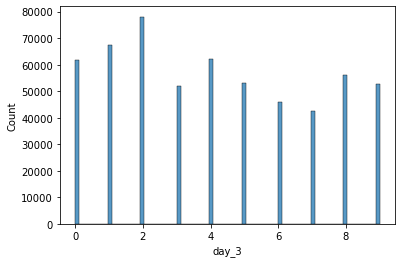

In [19]:
sns.histplot(data=df_result, x='day_3')

In [20]:
df_result_daycheck = df_result[~pd.isna(df_result['day_1'])]
df_result_daycheck = df_result_daycheck[~pd.isna(df_result_daycheck['day_2'])]
df_result_daycheck = df_result_daycheck[~pd.isna(df_result_daycheck['day_3'])]
df_result_daycheck['day'] = df_result_daycheck['day_1'].astype(str) + df_result_daycheck['day_2'].astype(str) + df_result_daycheck['day_3'].astype(str)
df_result_daycheck['day'] = df_result_daycheck['day'].astype(int)

In [21]:
print(len(df_result_daycheck))
df_result_daycheck[['day_1', 'day_2', 'day_3', 'day']].sample(10)

557009


day_1  day_2  day_3  day
742538      2      7      7  277
734554      0      8      6   86
525338      3      4      0  340
370770      1      8      7  187
129173      1      2      4  124
187682      1      1      0  110
436988      0      0      8    8
637950      0      9      2   92
462777      1      7      5  175
811386      1      6      5  165

In [22]:
df_result_nullday = df_result.loc[pd.isna(df_result['day_1']) | pd.isna(df_result['day_2']) | pd.isna(df_result['day_3'])]

In [23]:
print(len(df_result_nullday))
df_result_nullday[['day_1', 'day_2', 'day_3', 'day']].sample(10)

255597


day_1  day_2  day_3     day
64489    <NA>   <NA>   <NA>     NaN
48337    <NA>   <NA>   <NA>     NaN
783111      4   <NA>      6  4146.0
23358    <NA>   <NA>   <NA>     NaN
476550   <NA>   <NA>   <NA>     NaN
571099   <NA>   <NA>   <NA>     NaN
85683    <NA>   <NA>   <NA>     NaN
120452   <NA>   <NA>   <NA>     NaN
67930    <NA>   <NA>   <NA>     NaN
187239      4      9   <NA>  4914.0

In [24]:
df_result_nullday['day'] = np.nan
df_result_nullday[['day_1', 'day_2', 'day_3', 'day']].sample(10)

<ipython-input-24-34d74d3ccf00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_nullday['day'] = np.nan


day_1  day_2  day_3  day
91722    <NA>   <NA>   <NA>  NaN
505310   <NA>   <NA>   <NA>  NaN
786347      8   <NA>   <NA>  NaN
84616    <NA>   <NA>   <NA>  NaN
87717    <NA>   <NA>   <NA>  NaN
7134     <NA>   <NA>   <NA>  NaN
341115   <NA>   <NA>   <NA>  NaN
164455   <NA>   <NA>   <NA>  NaN
772285   <NA>      4   <NA>  NaN
74643    <NA>   <NA>   <NA>  NaN

In [25]:
df_result2 = pd.concat([df_result_daycheck, df_result_nullday])
print(len(df_result2))
df_result2.head()

812606


Roll Subdirectory filename processed_image_class  fmin   max_depth  \
0  R014207815     3488-15A   10.png                   num   1.5  387.500000   
1  R014207815     3488-15A  101.png                   num   1.5  556.250000   
2  R014207815     3488-15A  102.png                   num   1.5  654.166667   
3  R014207815     3488-15A  106.png                   num   1.5  504.166667   
4  R014207815     3488-15A  107.png                   num   1.5  504.166667   

     year    day  hour  minute  ...  minute_1  minute_2  second_1  second_2  \
0  1963.0  111.0  11.0    11.0  ...       1.0       1.0       1.0       2.0   
1  1963.0   11.0  11.0    11.0  ...       1.0       1.0       2.0       1.0   
2  1962.0  101.0  20.0    21.0  ...       2.0       1.0       1.0       1.0   
3  1962.0  110.0  20.0    21.0  ...       2.0       1.0       1.0       1.0   
4  1963.0   11.0  11.0    20.0  ...       2.0       0.0       2.0       1.0   

   station_number_1  station_number_2  metadata_type  is_dot  func_name  \
0               1.0               2.0            NaN     NaN        NaN   
1               1.0               2.0            NaN     NaN        NaN   
2               2.0               1.0            NaN     NaN        NaN   
3               2.0               1.0            NaN     NaN        NaN   
4               1.0               2.0            NaN     NaN        NaN   

   limits  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  

[5 rows x 28 columns]

#  

#### Check hour digits are < 10, reprocess hour:

In [26]:
df_result2[['hour_1', 'hour_2', 'hour']].sample(10)

hour_1  hour_2    hour
157024     NaN     NaN     NaN
380508     0.0     6.0     6.0
90656      NaN     NaN     NaN
702810     0.0     7.0     7.0
708670     0.0     5.0     5.0
580259     1.0     0.0    10.0
805198     1.0     9.0    19.0
757920     0.0     6.0     6.0
33314      3.0     1.0    31.0
208634    16.0    16.0  1616.0

<AxesSubplot:xlabel='hour_1', ylabel='Count'>

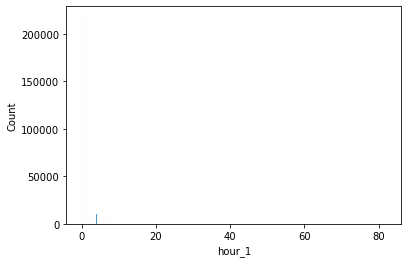

In [27]:
sns.histplot(data=df_result2, x='hour_1')

In [28]:
df_result2['hour_1'] = df_result2['hour_1'].apply(lambda x: np.nan if x>9 else x)
df_result2['hour_1'] = df_result2['hour_1'].astype('Int64')

<AxesSubplot:xlabel='hour_1', ylabel='Count'>

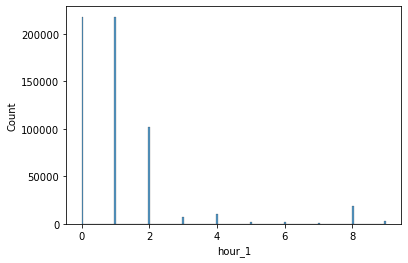

In [29]:
sns.histplot(data=df_result2, x='hour_1')

<AxesSubplot:xlabel='hour_2', ylabel='Count'>

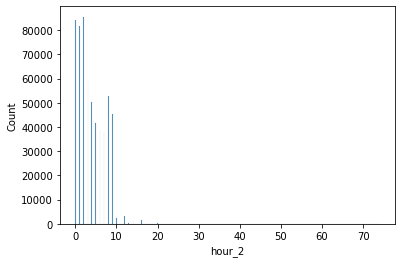

In [30]:
sns.histplot(data=df_result2, x='hour_2')

In [31]:
df_result2['hour_2'] = df_result2['hour_2'].apply(lambda x: np.nan if x>9 else x)
df_result2['hour_2'] = df_result2['hour_2'].astype('Int64')

<AxesSubplot:xlabel='hour_2', ylabel='Count'>

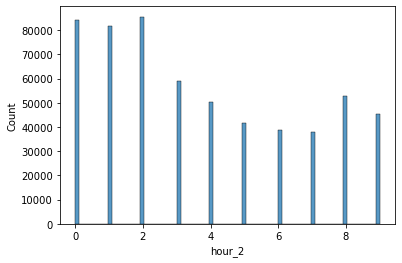

In [32]:
sns.histplot(data=df_result2, x='hour_2')

In [33]:
df_result_hourcheck = df_result2[~pd.isna(df_result2['hour_1'])]
df_result_hourcheck = df_result_hourcheck[~pd.isna(df_result_hourcheck['hour_2'])]
df_result_hourcheck['hour'] = df_result_hourcheck['hour_1'].astype(str) + df_result_hourcheck['hour_2'].astype(str)
df_result_hourcheck['hour'] = df_result_hourcheck['hour'].astype(int)

In [34]:
print(len(df_result_hourcheck))
df_result_hourcheck[['hour_1', 'hour_2', 'hour']].sample(10)

573121


hour_1  hour_2  hour
518494       2       0    20
364857       2       2    22
277270       1       3    13
332635       0       0     0
678585       1       8    18
113046       0       2     2
201679       1       0    10
87779        2       0    20
423748       0       7     7
735576       0       0     0

In [35]:
df_result_nullhour = df_result2.loc[pd.isna(df_result2['hour_1']) | pd.isna(df_result2['hour_2'])]

In [36]:
print(len(df_result_nullhour))
df_result_nullhour[['hour_1', 'hour_2', 'hour']].sample(10)

239485


hour_1  hour_2  hour
259287    <NA>    <NA>   NaN
78273     <NA>    <NA>   NaN
716983    <NA>    <NA>   NaN
157348    <NA>    <NA>   NaN
16204     <NA>    <NA>   NaN
609353    <NA>    <NA>   NaN
486726    <NA>    <NA>   NaN
93767     <NA>    <NA>   NaN
34902     <NA>    <NA>   NaN
374387    <NA>    <NA>   NaN

In [37]:
df_result3 = pd.concat([df_result_hourcheck, df_result_nullhour])
print(len(df_result3))
df_result3.head()

812606


Roll Subdirectory filename processed_image_class  fmin   max_depth  \
0  R014207815     3488-15A   10.png                   num   1.5  387.500000   
1  R014207815     3488-15A  101.png                   num   1.5  556.250000   
2  R014207815     3488-15A  102.png                   num   1.5  654.166667   
3  R014207815     3488-15A  106.png                   num   1.5  504.166667   
4  R014207815     3488-15A  107.png                   num   1.5  504.166667   

     year    day  hour  minute  ...  minute_1  minute_2  second_1  second_2  \
0  1963.0  111.0  11.0    11.0  ...       1.0       1.0       1.0       2.0   
1  1963.0   11.0  11.0    11.0  ...       1.0       1.0       2.0       1.0   
2  1962.0  101.0  20.0    21.0  ...       2.0       1.0       1.0       1.0   
3  1962.0  110.0  20.0    21.0  ...       2.0       1.0       1.0       1.0   
4  1963.0   11.0  11.0    20.0  ...       2.0       0.0       2.0       1.0   

   station_number_1  station_number_2  metadata_type  is_dot  func_name  \
0               1.0               2.0            NaN     NaN        NaN   
1               1.0               2.0            NaN     NaN        NaN   
2               2.0               1.0            NaN     NaN        NaN   
3               2.0               1.0            NaN     NaN        NaN   
4               1.0               2.0            NaN     NaN        NaN   

   limits  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  

[5 rows x 28 columns]

#  

#### Check minute digits are < 10, reprocess minute:

In [38]:
df_result3[['minute_1', 'minute_2', 'minute']].sample(10)

minute_1  minute_2  minute
522536       2.0       8.0    28.0
773741       8.0       4.0    84.0
337599       NaN       NaN     NaN
581076       3.0       8.0    38.0
409235       1.0       0.0    10.0
747781       0.0       0.0     0.0
400165       NaN       NaN     NaN
428755       4.0       1.0    41.0
368173       1.0       8.0    18.0
624473       NaN       NaN     NaN

<AxesSubplot:xlabel='minute_1', ylabel='Count'>

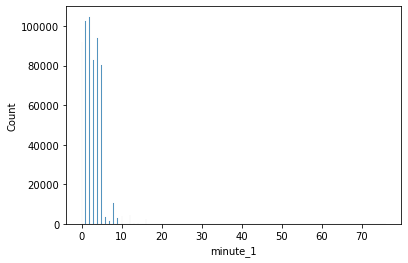

In [39]:
sns.histplot(data=df_result3, x='minute_1')

In [40]:
df_result3['minute_1'] = df_result3['minute_1'].apply(lambda x: np.nan if x>9 else x)
df_result3['minute_1'] = df_result3['minute_1'].astype('Int64')

<AxesSubplot:xlabel='minute_1', ylabel='Count'>

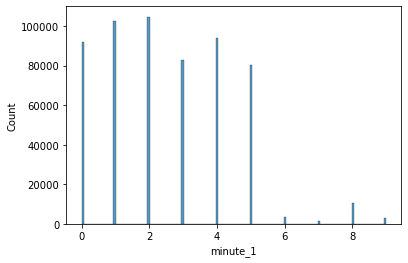

In [41]:
sns.histplot(data=df_result3, x='minute_1')

<AxesSubplot:xlabel='minute_2', ylabel='Count'>

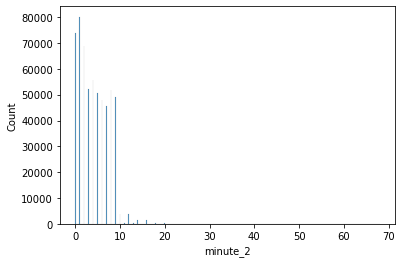

In [42]:
sns.histplot(data=df_result3, x='minute_2')

In [43]:
df_result3['minute_2'] = df_result3['minute_2'].apply(lambda x: np.nan if x>9 else x)
df_result3['minute_2'] = df_result3['minute_2'].astype('Int64')

<AxesSubplot:xlabel='minute_2', ylabel='Count'>

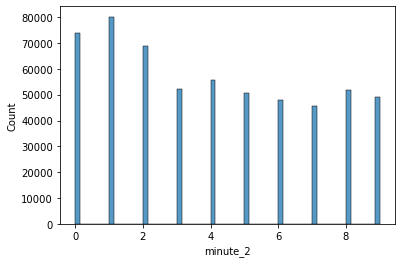

In [44]:
sns.histplot(data=df_result3, x='minute_2')

In [45]:
df_result_minutecheck = df_result3[~pd.isna(df_result3['minute_1'])]
df_result_minutecheck = df_result_minutecheck[~pd.isna(df_result_minutecheck['minute_2'])]
df_result_minutecheck['minute'] = df_result_minutecheck['minute_1'].astype(str) + df_result_minutecheck['minute_2'].astype(str)
df_result_minutecheck['minute'] = df_result_minutecheck['minute'].astype(int)

In [46]:
print(len(df_result_minutecheck))
df_result_minutecheck[['minute_1', 'minute_2', 'minute']].sample(10)

566741


minute_1  minute_2  minute
234192         1         4      14
291020         2         9      29
419046         5         1      51
5938           2         2      22
619960         3         4      34
320282         0         4       4
687328         3         9      39
570362         1         6      16
302204         2         9      29
566811         3         5      35

In [47]:
df_result_nullminute = df_result3.loc[pd.isna(df_result3['minute_1']) | pd.isna(df_result3['minute_2'])]

In [48]:
print(len(df_result_nullminute))
df_result_nullminute[['minute_1', 'minute_2', 'minute']].sample(10)

245865


minute_1  minute_2  minute
10682       <NA>      <NA>     NaN
53300       <NA>      <NA>     NaN
756899      <NA>      <NA>     NaN
24865       <NA>      <NA>     NaN
146443      <NA>      <NA>     NaN
591606      <NA>      <NA>     NaN
87981       <NA>      <NA>     NaN
302568      <NA>      <NA>     NaN
140138      <NA>      <NA>     NaN
646791      <NA>      <NA>     NaN

In [49]:
df_result4 = pd.concat([df_result_minutecheck, df_result_nullminute])
print(len(df_result4))
df_result4.head()

812606


Roll Subdirectory filename processed_image_class  fmin   max_depth  \
0  R014207815     3488-15A   10.png                   num   1.5  387.500000   
1  R014207815     3488-15A  101.png                   num   1.5  556.250000   
2  R014207815     3488-15A  102.png                   num   1.5  654.166667   
3  R014207815     3488-15A  106.png                   num   1.5  504.166667   
4  R014207815     3488-15A  107.png                   num   1.5  504.166667   

     year    day  hour  minute  ...  minute_1  minute_2  second_1  second_2  \
0  1963.0  111.0  11.0    11.0  ...         1         1       1.0       2.0   
1  1963.0   11.0  11.0    11.0  ...         1         1       2.0       1.0   
2  1962.0  101.0  20.0    21.0  ...         2         1       1.0       1.0   
3  1962.0  110.0  20.0    21.0  ...         2         1       1.0       1.0   
4  1963.0   11.0  11.0    20.0  ...         2         0       2.0       1.0   

   station_number_1  station_number_2  metadata_type  is_dot  func_name  \
0               1.0               2.0            NaN     NaN        NaN   
1               1.0               2.0            NaN     NaN        NaN   
2               2.0               1.0            NaN     NaN        NaN   
3               2.0               1.0            NaN     NaN        NaN   
4               1.0               2.0            NaN     NaN        NaN   

   limits  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  

[5 rows x 28 columns]

#  

#### Check second digits are < 10, reprocess second:

In [50]:
df_result4[['second_1', 'second_2', 'second']].sample(10)

second_1  second_2  second
666685       3.0       0.0    30.0
596413       5.0       7.0    57.0
391966       2.0       8.0    28.0
568031       3.0       0.0    30.0
232244       1.0       1.0    11.0
20621        NaN       NaN     NaN
753646       3.0       1.0    31.0
593722       0.0       7.0     7.0
654462       5.0       1.0    51.0
138793       NaN       NaN     NaN

<AxesSubplot:xlabel='second_1', ylabel='Count'>

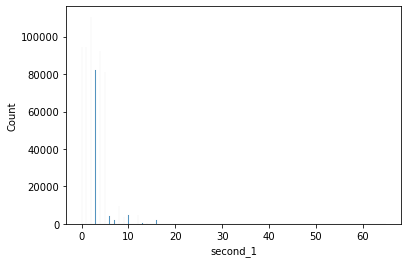

In [51]:
sns.histplot(data=df_result4, x='second_1')

In [52]:
df_result4['second_1'] = df_result4['second_1'].apply(lambda x: np.nan if x>9 else x)
df_result4['second_1'] = df_result4['second_1'].astype('Int64')

<AxesSubplot:xlabel='second_1', ylabel='Count'>

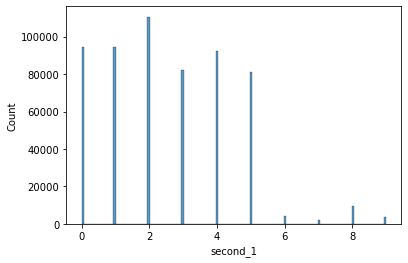

In [53]:
sns.histplot(data=df_result4, x='second_1')

<AxesSubplot:xlabel='second_2', ylabel='Count'>

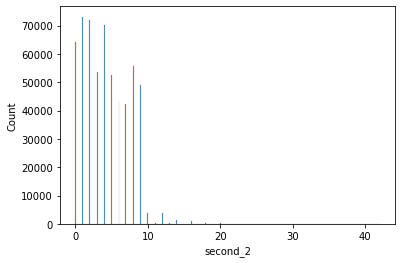

In [54]:
sns.histplot(data=df_result4, x='second_2')

In [55]:
df_result4['second_2'] = df_result4['second_2'].apply(lambda x: np.nan if x>9 else x)
df_result4['second_2'] = df_result4['second_2'].astype('Int64')

<AxesSubplot:xlabel='second_2', ylabel='Count'>

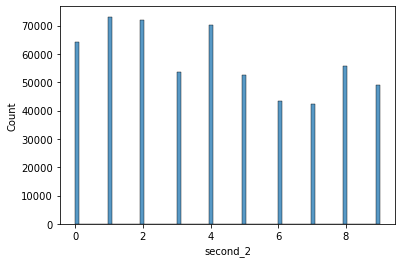

In [56]:
sns.histplot(data=df_result4, x='second_2')

In [57]:
df_result_secondcheck = df_result4[~pd.isna(df_result4['second_1'])]
df_result_secondcheck = df_result_secondcheck[~pd.isna(df_result_secondcheck['second_2'])]
df_result_secondcheck['second'] = df_result_secondcheck['second_1'].astype(str) + df_result_secondcheck['second_2'].astype(str)
df_result_secondcheck['second'] = df_result_secondcheck['second'].astype(int)

In [58]:
print(len(df_result_secondcheck))
df_result_secondcheck[['second_1', 'second_2', 'second']].sample(10)

567053


second_1  second_2  second
538417         5         2      52
86607          1         0      10
643803         0         7       7
523155         1         6      16
611975         3         8      38
313350         5         7      57
650247         3         0      30
90167          2         4      24
728072         2         3      23
763680         4         1      41

In [59]:
df_result_nullsecond = df_result4.loc[pd.isna(df_result4['second_1']) | pd.isna(df_result4['second_2'])]

In [60]:
print(len(df_result_nullsecond))
df_result_nullsecond[['second_1', 'second_2', 'second']].sample(10)

245553


second_1  second_2  second
768802         8      <NA>   812.0
122625      <NA>      <NA>     NaN
116820      <NA>      <NA>     NaN
64145       <NA>      <NA>     NaN
136256      <NA>      <NA>     NaN
93500       <NA>      <NA>     NaN
167758      <NA>      <NA>     NaN
132462      <NA>      <NA>     NaN
508209      <NA>      <NA>     NaN
503118      <NA>      <NA>     NaN

In [61]:
df_result5 = pd.concat([df_result_secondcheck, df_result_nullsecond])
print(len(df_result5))
df_result5.head()

812606


Roll Subdirectory filename processed_image_class  fmin   max_depth  \
0  R014207815     3488-15A   10.png                   num   1.5  387.500000   
1  R014207815     3488-15A  101.png                   num   1.5  556.250000   
2  R014207815     3488-15A  102.png                   num   1.5  654.166667   
3  R014207815     3488-15A  106.png                   num   1.5  504.166667   
4  R014207815     3488-15A  107.png                   num   1.5  504.166667   

     year    day  hour  minute  ...  minute_1  minute_2  second_1  second_2  \
0  1963.0  111.0  11.0    11.0  ...         1         1         1         2   
1  1963.0   11.0  11.0    11.0  ...         1         1         2         1   
2  1962.0  101.0  20.0    21.0  ...         2         1         1         1   
3  1962.0  110.0  20.0    21.0  ...         2         1         1         1   
4  1963.0   11.0  11.0    20.0  ...         2         0         2         1   

   station_number_1  station_number_2  metadata_type  is_dot  func_name  \
0               1.0               2.0            NaN     NaN        NaN   
1               1.0               2.0            NaN     NaN        NaN   
2               2.0               1.0            NaN     NaN        NaN   
3               2.0               1.0            NaN     NaN        NaN   
4               1.0               2.0            NaN     NaN        NaN   

   limits  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  

[5 rows x 28 columns]

#  

#### Get year for 'dot' type images:

In [62]:
df_dot = df_result5.loc[df_result5['processed_image_class'] == 'dot']
print(len(df_dot))
df_dot[['day_1', 'day_2', 'day_3', 'day', 'year']].sample(10)

50066


day_1  day_2  day_3    day  year
790501      8      0   <NA>    NaN   NaN
790185      0   <NA>      0    NaN   NaN
789550      0      0   <NA>    NaN   NaN
787669      0      8      2   82.0   NaN
243952      4      0      5  405.0   NaN
776176      0      8      0   80.0   NaN
790156      8      0      4  804.0   NaN
779452      8      4   <NA>    NaN   NaN
241325      0      0      8    8.0   NaN
319497      4   <NA>      2    NaN   NaN

<AxesSubplot:xlabel='day', ylabel='Count'>

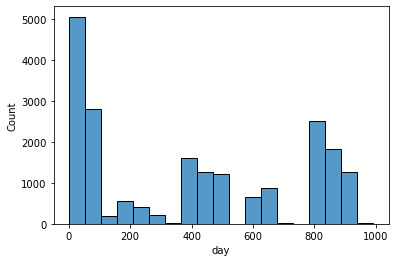

In [63]:
sns.histplot(data=df_dot, x='day')

Assuming that 'day' should be between 1 and 365:

In [64]:
for i in range(0, len(df_dot)):
    day = df_dot['day'].iloc[i]
    if (day < 366) & (day > 0):
        if day > 271:
            df_dot['year'].iloc[i] = 1962
        else:
            df_dot['year'].iloc[i] = 1963

c:\DevSoftware\Anaconda38\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\DevSoftware\Anaconda38\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [65]:
df_dot[['day_1', 'day_2', 'day_3', 'day', 'year']].sample(10)

day_1  day_2  day_3    day    year
766723      8      2      0  820.0     NaN
326847      2   <NA>   <NA>    NaN     NaN
784021      8      1      8  818.0     NaN
773187      0   <NA>   <NA>    NaN     NaN
321400      0   <NA>   <NA>    NaN     NaN
787017      8      1   <NA>    NaN     NaN
225139      1      6      0  160.0  1963.0
188885      3      0      3  303.0  1962.0
783453      2      7      7  277.0  1962.0
330819      6      3      2  632.0     NaN

In [66]:
df_not_dot = df_result5.loc[df_result5['processed_image_class'] != 'dot']
print(len(df_not_dot))

762540


In [67]:
df_result6 = pd.concat([df_dot, df_not_dot])
print(len(df_result6))
df_result6.head()

812606


Roll Subdirectory       filename processed_image_class  \
170609  R014207907F          303  Image0141.png                   dot   
171629  R014207907F          490  Image0022.png                   dot   
171632  R014207907F          490  Image0033.png                   dot   
171635  R014207907F          490  Image0036.png                   dot   
171637  R014207907F          490  Image0038.png                   dot   

            fmin    max_depth  year    day  hour  minute  ...  minute_1  \
170609  1.612903  1328.947368   NaN  880.0   8.0    88.0  ...         8   
171629  1.552419  1530.000000   NaN  802.0  89.0    94.0  ...         9   
171632  1.508065  1430.000000   NaN  802.0  81.0    88.0  ...         8   
171635  1.528226  1555.000000   NaN  808.0  88.0    80.0  ...         8   
171637  1.528226  1492.500000   NaN  802.0  81.0    80.0  ...         8   

        minute_2  second_1  second_2  station_number_1  station_number_2  \
170609         8         8         0               NaN               NaN   
171629         4         0         9               NaN               NaN   
171632         8         1         8               NaN               NaN   
171635         0         4         1               NaN               NaN   
171637         0         8         4               NaN               NaN   

        metadata_type  is_dot  func_name  limits  
170609            NaN     NaN        NaN     NaN  
171629            NaN     NaN        NaN     NaN  
171632            NaN     NaN        NaN     NaN  
171635            NaN     NaN        NaN     NaN  
171637            NaN     NaN        NaN     NaN  

[5 rows x 28 columns]

#  

#### Construct timestamp:

In [68]:
df_result6['day_of_year'] = df_result6['day']
df_result6['day_of_year'] = df_result6['day_of_year'].apply(lambda x: np.nan if x==0 else x)
df_result6['day_of_year'] = df_result6['day_of_year'].apply(lambda x: np.nan if x>365 else x)
df_result6['month_day'] = pd.to_datetime(df_result6['day_of_year'], format='%j').dt.strftime('%m-%d')
df_result6['month'] = df_result6['month_day'].str.split('-').str[0]
df_result6['day'] = df_result6['month_day'].str.split('-').str[1]
df_result6['hour'] = df_result6['hour'].apply(lambda x: np.nan if x>24 else x)
df_result6['minute'] = df_result6['minute'].apply(lambda x: np.nan if x>60 else x)
df_result6['second'] = df_result6['second'].apply(lambda x: np.nan if x>60 else x)
df_result6['Timestamp'] = pd.to_datetime(df_result6[['year', 'month', 'day', 'hour', 'minute', 'second']], format='%Y-%m-%d %H:%M:%S')

In [105]:
df_result6[['year', 'month', 'day', 'hour', 'minute', 'second', 'Timestamp']].sample(10)

year month  day  hour  minute  second           Timestamp
427675  1966.0    11   12  12.0    42.0    54.0 1966-11-12 12:42:54
805181  1965.0    11   11   8.0    12.0     4.0 1965-11-11 08:12:04
519043  1966.0    10   22  13.0    19.0    47.0 1966-10-22 13:19:47
283658  1965.0    05   29  17.0    48.0    15.0 1965-05-29 17:48:15
160396  1963.0    07   22  22.0     1.0     1.0 1963-07-22 22:01:01
619760  1966.0    04   19  11.0     9.0     1.0 1966-04-19 11:09:01
526361  1966.0    12   16  16.0    45.0    25.0 1966-12-16 16:45:25
424948     NaN   NaN  NaN   NaN     NaN     NaN                 NaT
453369  1967.0    05   05  17.0    54.0     6.0 1967-05-05 17:54:06
18393      NaN   NaN  NaN   NaN     NaN     NaN                 NaT

#  

#### Check station number digits are < 10, reprocess station number:

In [70]:
df_result6[['station_number_1', 'station_number_2', 'station_number']].sample(10)

station_number_1  station_number_2  station_number
303336               0.0               5.0             5.0
657800               NaN               NaN             NaN
778318               NaN               NaN             1.0
778650               NaN               NaN             1.0
795153               0.0               5.0             5.0
115131               NaN               NaN             NaN
51307                NaN               NaN             NaN
203262               0.0               5.0             5.0
588503               NaN               NaN             NaN
463889               1.0               5.0            15.0

<AxesSubplot:xlabel='station_number_1', ylabel='Count'>

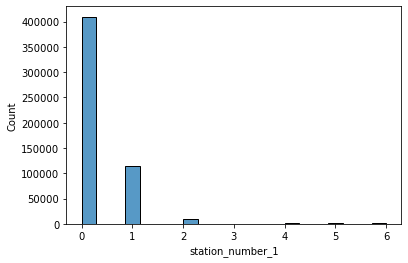

In [71]:
sns.histplot(data=df_result6, x='station_number_1')

In [72]:
df_result6['station_number_1'] = df_result6['station_number_1'].apply(lambda x: np.nan if x>9 else x)
df_result6['station_number_1'] = df_result6['station_number_1'].astype('Int64')

<AxesSubplot:xlabel='station_number_1', ylabel='Count'>

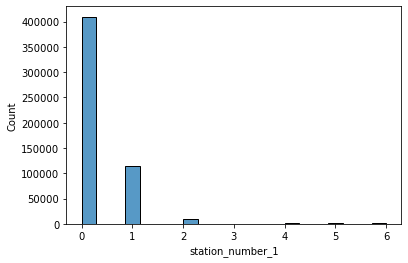

In [73]:
sns.histplot(data=df_result6, x='station_number_1')

<AxesSubplot:xlabel='station_number_2', ylabel='Count'>

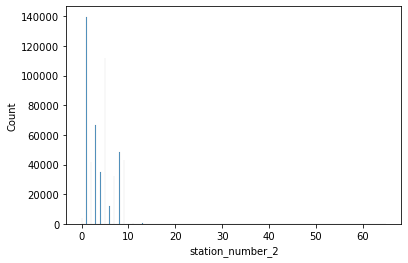

In [74]:
sns.histplot(data=df_result6, x='station_number_2')

In [75]:
df_result6['station_number_2'] = df_result6['station_number_2'].apply(lambda x: np.nan if x>9 else x)
df_result6['station_number_2'] = df_result6['station_number_2'].astype('Int64')

<AxesSubplot:xlabel='station_number_2', ylabel='Count'>

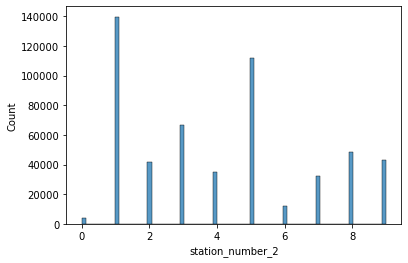

In [76]:
sns.histplot(data=df_result6, x='station_number_2')

In [77]:
df_result_stnnumcheck = df_result6[~pd.isna(df_result6['station_number_1'])]
df_result_stnnumcheck = df_result_stnnumcheck[~pd.isna(df_result_stnnumcheck['station_number_2'])]
df_result_stnnumcheck['station_number'] = df_result_stnnumcheck['station_number_1'].astype(str) + df_result_stnnumcheck['station_number_2'].astype(str)
df_result_stnnumcheck['station_number'] = df_result_stnnumcheck['station_number'].astype(int)

In [78]:
print(len(df_result_stnnumcheck))
df_result_stnnumcheck[['station_number_1', 'station_number_2', 'station_number']].sample(10)

536127


station_number_1  station_number_2  station_number
810214                 0                 9               9
357594                 0                 5               5
30053                  1                 1              11
225279                 0                 1               1
542980                 0                 6               6
647167                 0                 1               1
479015                 0                 4               4
661235                 0                 1               1
194443                 0                 3               3
636262                 1                 8              18

In [79]:
df_result_nullstnnum = df_result6.loc[pd.isna(df_result6['station_number_1']) | pd.isna(df_result6['station_number_2'])]

In [80]:
print(len(df_result_nullstnnum))
df_result_nullstnnum[['station_number_1', 'station_number_2', 'station_number']].sample(10)

276479


station_number_1  station_number_2  station_number
16801               <NA>              <NA>             NaN
114450              <NA>              <NA>             NaN
789756              <NA>              <NA>            10.0
771887              <NA>              <NA>             1.0
279895              <NA>              <NA>             NaN
64486               <NA>              <NA>             NaN
245667              <NA>              <NA>             5.0
781982              <NA>              <NA>            18.0
82591               <NA>              <NA>             NaN
536769              <NA>              <NA>             NaN

In [81]:
df_result7 = pd.concat([df_result_stnnumcheck, df_result_nullstnnum])
print(len(df_result7))
df_result7.head()

812606


Roll Subdirectory filename processed_image_class  fmin   max_depth  \
0  R014207815     3488-15A   10.png                   num   1.5  387.500000   
1  R014207815     3488-15A  101.png                   num   1.5  556.250000   
2  R014207815     3488-15A  102.png                   num   1.5  654.166667   
3  R014207815     3488-15A  106.png                   num   1.5  504.166667   
4  R014207815     3488-15A  107.png                   num   1.5  504.166667   

     year day  hour  minute  ...  station_number_1  station_number_2  \
0  1963.0  21  11.0    11.0  ...                 1                 2   
1  1963.0  11  11.0    11.0  ...                 1                 2   
2  1962.0  11  20.0    21.0  ...                 2                 1   
3  1962.0  20  20.0    21.0  ...                 2                 1   
4  1963.0  11  11.0    20.0  ...                 1                 2   

   metadata_type  is_dot  func_name  limits  day_of_year  month_day  month  \
0            NaN     NaN        NaN     NaN        111.0      04-21     04   
1            NaN     NaN        NaN     NaN         11.0      01-11     01   
2            NaN     NaN        NaN     NaN        101.0      04-11     04   
3            NaN     NaN        NaN     NaN        110.0      04-20     04   
4            NaN     NaN        NaN     NaN         11.0      01-11     01   

            Timestamp  
0 1963-04-21 11:11:12  
1 1963-01-11 11:11:21  
2 1962-04-11 20:21:11  
3 1962-04-20 20:21:11  
4 1963-01-11 11:20:21  

[5 rows x 32 columns]

#  

#### Retrieve correct station code:

In [82]:
df_stn_nums = pd.read_excel(f'{dataDir}station_number_changes.xlsx')
df_stn_nums.head()

Station_Number Station_Code               Station_Name Start_Date  \
0               1          RES   Resolute Bay, NT, Canada 1962-09-29   
1               1          BPT     Blossom Point, MD, USA 1965-07-01   
2               2          PRI  Prince Albert, SK, Canada 1962-09-29   
3               3          OTT             Ottawa, Canada 1962-09-29   
4               3          FTM        Fort Myers, FL, USA 1965-07-01   

                           Notes  
0  Assumed start date at launch.  
1                            NaN  
2  Assumed start date at launch.  
3  Assumed start date at launch.  
4                            NaN

Approach 1 - By lookup and replace - too inefficient (too long, too much RAM usage):

In [83]:
#df_result8 = df_result7.copy(deep=True)
#df_result7['Station_Code'] = ''
#df_result8.to_csv(dataDir + 'result_total_v20230304.csv')

In [84]:
'''start = time.time()
df_result8 = pd.read_csv(dataDir + 'result_total_v20230304.csv')
batch_size = 100
for i in range(0, len(df_result8)):
    if i % batch_size == 0:
        if i > 0:
            end = time.time()
            t = end - start
            v = batch_size/t
            t_est = round(((len(df_result) - i)/v)/60, 3)
            print(str(i) + ' : ' + str(t_est) + ' min to go')
            #df_result8.to_csv(dataDir + 'result_total_v20230304.csv')
            start = time.time()
            #df_result8 = pd.read_csv(dataDir + 'result_total_v20230304.csv')
    stn_num = df_result8['station_number'].iloc[i]
    datetime = df_result8['Timestamp'].iloc[i]
    if ~np.isnan(stn_num):
        df_stn_nums_ = df_stn_nums.loc[df_stn_nums['Station_Number'] == stn_num]
        df_stn_nums_ = df_stn_nums_.loc[df_stn_nums_['Start_Date'] < datetime]
        if len(df_stn_nums_) > 0:
            df_stn_nums_ = df_stn_nums_.sort_values('Start_Date', ascending=False)
            df_result8.loc['Station_Code', i] = df_stn_nums_['Station_Code'].iloc[0]'''

"start = time.time()\ndf_result8 = pd.read_csv(dataDir + 'result_total_v20230304.csv')\nbatch_size = 100\nfor i in range(0, len(df_result8)):\n    if i % batch_size == 0:\n        if i > 0:\n            end = time.time()\n            t = end - start\n            v = batch_size/t\n            t_est = round(((len(df_result) - i)/v)/60, 3)\n            print(str(i) + ' : ' + str(t_est) + ' min to go')\n            #df_result8.to_csv(dataDir + 'result_total_v20230304.csv')\n            start = time.time()\n            #df_result8 = pd.read_csv(dataDir + 'result_total_v20230304.csv')\n    stn_num = df_result8['station_number'].iloc[i]\n    datetime = df_result8['Timestamp'].iloc[i]\n    if ~np.isnan(stn_num):\n        df_stn_nums_ = df_stn_nums.loc[df_stn_nums['Station_Number'] == stn_num]\n        df_stn_nums_ = df_stn_nums_.loc[df_stn_nums_['Start_Date'] < datetime]\n        if len(df_stn_nums_) > 0:\n            df_stn_nums_ = df_stn_nums_.sort_values('Start_Date', ascending=False)\n    

#    

Approach 2 - Partition results by the change dates, and merge in Station_Code:

In [85]:
change_dates = df_stn_nums['Start_Date'].drop_duplicates().sort_values().reset_index(drop=True)
change_dates

0   1962-09-29
1   1963-04-25
2   1963-08-06
3   1965-07-01
Name: Start_Date, dtype: datetime64[ns]

In [86]:
stn_nums = df_stn_nums['Station_Number'].unique()
stn_nums

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 25, 37, 38, 43, 44, 46, 48, 49, 50, 51, 53, 55, 63,
       65, 69, 70, 71, 74], dtype=int64)

In [87]:
df_result8 = pd.DataFrame()

In [88]:
for i in range(len(change_dates)):
    #Before the first change date - Assume there are no station numbers before launch
    if i == 0:
        print(change_dates[i])
        df_part = df_result7.loc[df_result7['Timestamp'] < change_dates[i]]
        df_result8 = pd.concat([df_result8, df_part])
        print(len(df_result8))

    elif i > 0:
        print(change_dates[i])
        df_part_ = df_result7.loc[df_result7['Timestamp'] < change_dates[i]]
        df_part_ = df_part_.loc[df_part_['Timestamp'] >= change_dates[i-1]]

        df_sns = pd.DataFrame()
        for sn in stn_nums:
            df_sn = df_stn_nums.loc[df_stn_nums['Station_Number'] == sn]
            df_sn = df_sn.loc[df_sn['Start_Date'] < change_dates[i]]
            if len(df_sn) > 1:
                df_sn = df_sn.sort_values('Start_Date', ascending=False)
                df_sn = df_sn.iloc[:1]
            df_sns = pd.concat([df_sns, df_sn])

        df_part = df_part_.merge(df_sns[['Station_Number', 'Station_Code']], how='left', left_on='station_number', right_on='Station_Number')
        df_result8 = pd.concat([df_result8, df_part])
        print(len(df_result8))

#After last change date
last_change_date = change_dates[len(change_dates)-1]
print(f'After {str(last_change_date)}')
df_part_ = df_result7.loc[df_result7['Timestamp'] > last_change_date]

df_sns = pd.DataFrame()
for sn in stn_nums:
    df_sn = df_stn_nums.loc[df_stn_nums['Station_Number'] == sn]
    if len(df_sn) > 1:
        df_sn = df_sn.sort_values('Start_Date', ascending=False)
        df_sn = df_sn.iloc[:1]
    df_sns = pd.concat([df_sns, df_sn])

df_part = df_part_.merge(df_sns[['Station_Number', 'Station_Code']], how='left', left_on='station_number', right_on='Station_Number')
df_result8 = pd.concat([df_result8, df_part])
print(len(df_result8))

1962-09-29 00:00:00
3290
1963-04-25 00:00:00
24480
1963-08-06 00:00:00
30787
1965-07-01 00:00:00
177945
After 1965-07-01 00:00:00
501346


In [89]:
print(len(df_result8))
df_result8[['station_number', 'Station_Number', 'Timestamp', 'Station_Code']].sample(10)

501346


station_number  Station_Number           Timestamp Station_Code
77888              7.0             7.0 1965-06-22 17:10:06          QUI
181866             5.0             5.0 1967-05-15 16:58:44          QUI
263056            13.0            13.0 1966-02-05 12:59:03          COL
26035              5.0             5.0 1965-01-27 04:55:04          COL
91233              1.0             1.0 1966-11-14 12:05:36          BPT
51602              5.0             5.0 1966-07-05 07:24:03          QUI
115964             1.0             1.0 1967-05-21 20:51:26          BPT
14492              2.0             2.0 1964-01-23 00:22:24          PRI
315134             9.0             9.0 1965-07-21 23:27:16          SOL
17771              4.0             4.0 1965-09-11 17:42:33          NEW

<AxesSubplot:xlabel='Station_Number', ylabel='Count'>

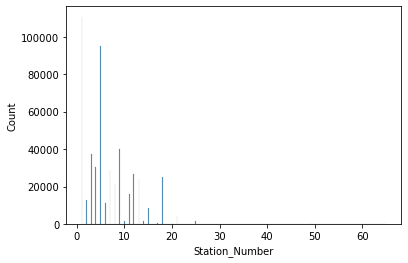

In [90]:
sns.histplot(data=df_result8, x='Station_Number')

Add part with null Timestamp:

In [91]:
df_part_null = df_result7.loc[pd.isna(df_result7['Timestamp'])]
print(len(df_part_null))
df_part_null.head()

311260


Roll Subdirectory filename processed_image_class      fmin  \
711  R014207815     3490-15A  146.png                   num  1.500000   
726  R014207815     3490-15A  130.png                   num  1.705645   
761  R014207815      3491-8A   58.png                   num  1.705645   
771  R014207815      3491-8A  107.png                   num  1.500000   
802  R014207815      3491-8A  148.png                   num  1.504032   

       max_depth    year  day  hour  minute  ...  station_number_1  \
711   556.250000  1962.0  NaN  22.0    24.0  ...                 2   
726   608.333333  1965.0   22   NaN    40.0  ...                 0   
761  1150.000000  1962.0  NaN  15.0    22.0  ...                 0   
771  1337.500000  1962.0  NaN   4.0    33.0  ...                 1   
802  1212.500000  1963.0  NaN   5.0    23.0  ...                 1   

     station_number_2  metadata_type  is_dot  func_name  limits  day_of_year  \
711                 0            NaN     NaN        NaN     NaN          NaN   
726                 3            NaN     NaN        NaN     NaN         22.0   
761                 5            NaN     NaN        NaN     NaN          NaN   
771                 5            NaN     NaN        NaN     NaN          NaN   
802                 5            NaN     NaN        NaN     NaN          NaN   

     month_day  month  Timestamp  
711        NaN    NaN        NaT  
726      01-22     01        NaT  
761        NaN    NaN        NaT  
771        NaN    NaN        NaT  
802        NaN    NaN        NaT  

[5 rows x 32 columns]

In [92]:
df_result8 = pd.concat([df_result8, df_part_null])

In [93]:
print(len(df_result8))
df_result8[['station_number', 'Station_Number', 'Timestamp', 'Station_Code']].sample(10)

812606


station_number  Station_Number           Timestamp Station_Code
479164             NaN             NaN                 NaT          NaN
187817             8.0             8.0 1967-02-27 08:28:14          SNT
57225              3.0             3.0 1966-08-28 07:53:28          FTM
90844              NaN             NaN                 NaT          NaN
142848             9.0             9.0 1965-05-15 08:15:34          SOL
258910             8.0             8.0 1966-01-24 23:54:31          SNT
32344             11.0             NaN                 NaT          NaN
314022             9.0             9.0 1965-07-07 23:30:19          SOL
182400             5.0             5.0 1967-05-21 13:39:40          QUI
178431             8.0             8.0 1967-02-03 11:02:09          SNT

#  

#### Get station details:

In [94]:
df_stns = pd.read_csv(f'{dataDir}ground_stations.csv')
df_stns.head()

Station_Code              Station_Name    Lat     Lng  \
0          ANT        Antofagasta, Chile  23.6S   70.3W   
1          BAT  Byrd Station, Antarctica    80S  119.3W   
2          BFR          Bretigny, France  48.4N   2.2 E   
3          BLR          Boulder, CO, USA  40.1N  105.1W   
4          BPT    Blossom Point, MD, USA  38.4N   77.1W   

                                               Notes  
0                                                NaN  
1    Ref: https://en.wikipedia.org/wiki/Byrd_Station  
2  Ref: https://en.wikipedia.org/wiki/Br%C3%A9tig...  
3                                                NaN  
4                                                NaN

In [95]:
df_result9 = df_result8.merge(df_stns[['Station_Code', 'Station_Name', 'Lat', 'Lng']], how='left', on='Station_Code')

In [96]:
print(len(df_result9))
df_result9[['Station_Number', 'Timestamp', 'Station_Code', 'Station_Name', 'Lat', 'Lng']].sample(10)

812606


Station_Number           Timestamp Station_Code  \
791596             NaN                 NaT          NaN   
95814              5.0 1965-03-29 23:29:34          COL   
151017            13.0 1965-06-26 06:38:36          GRK   
411120            18.0 1966-04-21 10:00:45          WOO   
195873             4.0 1965-09-18 03:08:18          NEW   
198611             8.0 1965-07-10 04:43:17          SNT   
648650             NaN                 NaT          NaN   
693094             NaN                 NaT          NaN   
721122             NaN                 NaT          NaN   
646608             NaN                 NaT          NaN   

                       Station_Name    Lat     Lng  
791596                          NaN    NaN     NaN  
95814   College, Fairbanks, AK, USA  64.9N  147.8W  
151017    East Grant Forks, MN, USA    48N   97.1W  
411120           Woomera, Australia  31.1S  136.8E  
195873       St. John's, NL, Canada  47.6N   52.4W  
198611              Santiago, Chile  33.2S   70.1W  
648650                          NaN    NaN     NaN  
693094                          NaN    NaN     NaN  
721122                          NaN    NaN     NaN  
646608                          NaN    NaN     NaN

#  

#### Save:

In [97]:
#df_result9 = df_result9.sort_values('Timestamp').reset_index(drop=True)

In [98]:
#df_result9.to_csv(dataDir + 'result_total_v20230305.csv', index=False)